In [1]:
import polars as pl
import pandas as pd
import pyedflib
import mne
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from tqdm.auto import tqdm

from src.settings import EEG_FEAT_IDX

In [14]:
def get_np_data(path, chch_map, ch_idx_map):
    data = mne.io.read_raw_edf(path, include=list(chch_map.keys()), infer_types=True, verbose=False)
    if len(data) == 0:
        return None
    data = data.resample(200)
    mapping_idx = {i: ch_idx_map[chch_map[ch]] for i, ch in enumerate(data.ch_names)}
    out = np.zeros(shape=(len(data), 19))
    data = data.get_data().T
    for idx, out_idx in mapping_idx.items():
        out[:, out_idx] = data[:, idx]
    return out


def parse_path_save_data(path, chch_map, ch_idx_map):
    k = 0
    fname = Path(path).stem
    patient_id, eeg_id, eeg_sub_id = fname.split("_")
    eeg_id = patient_id + "_" + eeg_id
    df = pl.read_csv(path, skip_rows=5).filter(pl.col("channel") == "FP1-F7")
    df = df.filter(pl.col("label") != "bckg")
    np_data = get_np_data(str(path).replace('csv', 'edf'), chch_map, ch_idx_map)
    if np_data is None:
        return
    if len(np_data) < 50 * 200:
        k += 1
        print("Skipped", k)
        return
    if len(df) == 0:
        min_start = max(0, len(np_data) - 50 * 200)
        start = int(np.random.rand() * min_start)
        np_data = np_data[start:50*200+start]
        target = 'bckg'
    else: 
        offset = int(np.random.rand() * 50 * 200)
        start = int(df['start_time'][0] * 200) - 25 * 200
        start = min(start, len(np_data) - 50 * 200)
        start = max(0, start) + offset
        np_data = np_data[start: start + 50 * 200]
        target = df['label'][0]
        
    np.save(f'data/tug_np/{eeg_id}_{eeg_sub_id}.npy', np_data)
    return patient_id, eeg_id, eeg_sub_id, target


In [15]:
chch_mapping = {
    'FP1-REF': "Fp1",
 'FP2-REF': "Fp2",
 'F3-REF': "F3",
 'F4-REF': "F4",
 'C3-REF': "C3",
 'C4-REF': "C4",
 'P3-REF': "P3",
 'P4-REF': "P4",
 'O1-REF': "O1",
 'O2-REF': "O2",
 'F7-REF': "F7",
 'F8-REF': "F8",
 'T3-REF': "T3",
 'T4-REF': "T4",
 'T5-REF': "T5",
 'T6-REF': "T6",
 'FZ-REF': "Fz",
 'CZ-REF': "Cz",
 'PZ-REF': "Pz",
    'FP1-LE': "Fp1",
 'FP2-LE': "Fp2",
 'F3-LE': "F3",
 'F4-LE': "F4",
 'C3-LE': "C3",
 'C4-LE': "C4",
 'P3-LE': "P3",
 'P4-LE': "P4",
 'O1-LE': "O1",
 'O2-LE': "O2",
 'F7-LE': "F7",
 'F8-LE': "F8",
 'T3-LE': "T3",
 'T4-LE': "T4",
 'T5-LE': "T5",
 'T6-LE': "T6",
 'FZ-LE': "Fz",
 'CZ-LE': "Cz",
 'PZ-LE': "Pz"
}

In [16]:
all_paths = list(Path("./data/tug-data/edf").glob("*/*/*/*/*.csv"))
pids, eids, esids, targets = [], [], [], []
for i, path in enumerate(all_paths):
    if i % 100 == 0:
        print(i)
    out = parse_path_save_data(path, chch_mapping, EEG_FEAT_IDX)
    if out is None:
        continue
    pid, eid, esid, target = out
    pids.append(pid)
    eids.append(eid)
    esids.append(esid)
    targets.append(target)

df = pd.DataFrame({'patient_id': pids, 'eeg_id': eids, 'eeg_sub_id': esids, 'target': targets})

0
Skipped 1
100
Skipped 1
Skipped 1
Skipped 1
200
Skipped 1
Skipped 1
300
Skipped 1
Skipped 1
400
Skipped 1
500
Skipped 1
600
Skipped 1
Skipped 1
Skipped 1
Skipped 1
700
Skipped 1
Skipped 1
Skipped 1
Skipped 1
800
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
900
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
1000
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
1100
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
1200
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
1300
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
1400
Skipped 1
Skipped 1
Skipped 1
Skipped 1
1500
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
1600
Skipped 1
Skipped 1
1700
Skipped 1
Skipped 1
Skipped 1
Sk

/tmp/ipykernel_1066683/1894137001.py:2: RuntimeWarning: Number of records from the header does not match the file size (perhaps the recording was not stopped before exiting). Inferring from the file size.
  data = mne.io.read_raw_edf(path, include=list(chch_map.keys()), infer_types=True, verbose=False)


Skipped 1
Skipped 1
Skipped 1
Skipped 1
5700
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
5800
Skipped 1
5900
Skipped 1
Skipped 1
Skipped 1
6000
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
6100
6200
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
6300
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
6400
Skipped 1
Skipped 1
Skipped 1
6500
Skipped 1
Skipped 1
Skipped 1
Skipped 1
6600
6700
Skipped 1
6800
Skipped 1
Skipped 1
Skipped 1
6900
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
7000
Skipped 1
Skipped 1
Skipped 1
7100
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
Skipped 1
7200
Skipped 1
Skipped 1
Skipped 1
7300
Skipped 1


In [17]:
df = pd.DataFrame({'patient_id': pids, 'eeg_id': eids, 'eeg_sub_id': esids, 'target': targets})
df.shape

(6893, 4)

In [18]:
df.to_csv("./data/tug_seizure_train.csv", index=False)

In [19]:
df.head()

,patient_id,eeg_id,eeg_sub_id,target
0,aaaaaqek,aaaaaqek_s010,t001,bckg
1,aaaaaqek,aaaaaqek_s010,t005,tcsz
2,aaaaaqek,aaaaaqek_s010,t004,bckg
3,aaaaaqek,aaaaaqek_s010,t002,bckg
4,aaaaaqek,aaaaaqek_s010,t008,bckg


In [39]:
def plot_eeg_data(data, sample_rate=200):
    fig = make_subplots(
        rows=4, cols=1, shared_xaxes=True, shared_yaxes=True, vertical_spacing=0.02
    )
    fig.add_trace(
        go.Scatter(
            x=np.arange(len(data)) / sample_rate,
            y=data[:, 0],
            mode="lines",
            name="channel 1",
        ),
        row=1,
        col=1,
    )
    fig.add_trace(
        go.Scatter(
            x=np.arange(len(data)) / sample_rate,
            y=data[:, 1],
            mode="lines",
            name="channel 2",
        ),
        row=2,
        col=1,
    )
    fig.add_trace(
        go.Scatter(
            x=np.arange(len(data)) / sample_rate,
            y=data[:, 2],
            mode="lines",
            name="channel 3",
        ),
        row=3,
        col=1,
    )
    fig.add_trace(
        go.Scatter(
            x=np.arange(len(data)) / sample_rate,
            y=data[:, 3],
            mode="lines",
            name="channel 4",
        ),
        row=4,
        col=1,
    )
    fig.update_layout(title_text="EEG data", height=600, width=1200)
    fig.show()

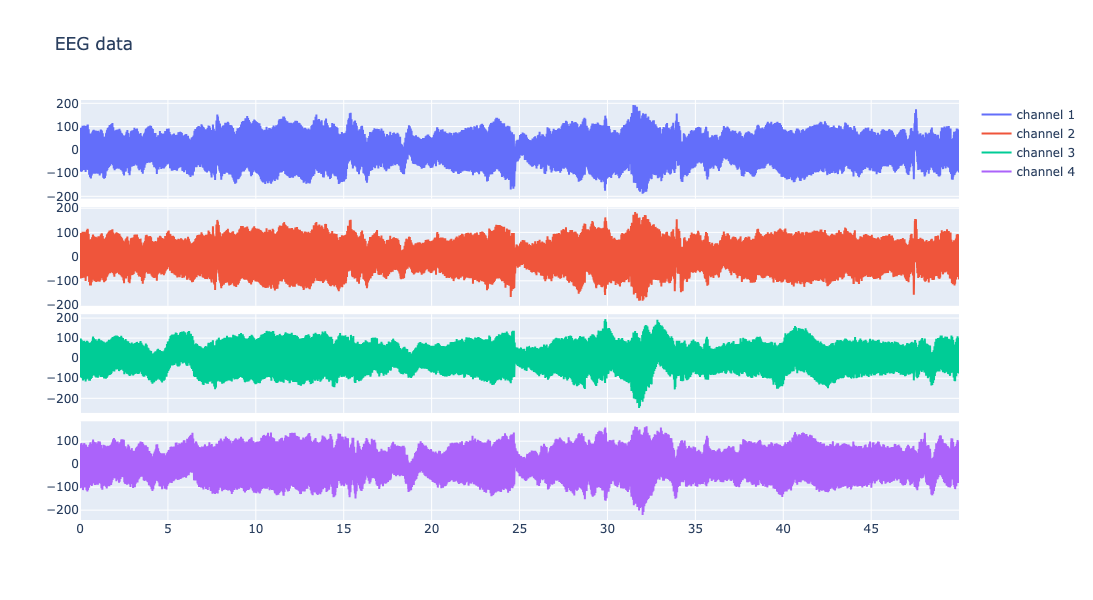

In [49]:
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
eeg_data = np.load('./data/tug_np/aaaaaaag_s004_t000.npy')
plot_eeg_data(eeg_data*10**6)

In [151]:
# df = pl.read_csv("data/tug-data/edf/train/aaaaaaac/s001_2002/02_tcp_le/aaaaaaac_s001_t000.csv", skip_rows=5).filter(pl.col("channel") == "FP1-F7")
# df

channel,start_time,stop_time,label,confidence
str,f64,f64,str,f64
"""FP1-F7""",0.0,36.8868,"""bckg""",1.0
"""FP1-F7""",36.8868,183.3055,"""cpsz""",1.0
"""FP1-F7""",183.3055,301.0,"""bckg""",1.0


In [ ]:
# Algo 
# read .csv
# filter FP1-F7 - if unque label only 'bckg'
#    just take first 50 s
# else:
#  take floor[start of first non bckg label ]50 , if startTime/50 > 25, move start time by 20 s, also take next sample with no overlap
# save npy resapled to 200 ; 
# patient id is the aaaa thing
# eeg id is session id
# eeg sub id is t000 thing

In [161]:
!head "data/tug-data/edf/train/aaaaaajv/s002_2004/02_tcp_le/aaaaaajv_s002_t000.csv"

# version = csv_v1.0.0
# bname = aaaaaajv_s002_t000
# duration = 1425.00 secs
# montage_file = $NEDC_NFC/lib/nedc_eas_default_montage.txt
#
channel,start_time,stop_time,label,confidence
FP1-F7,0.0000,1425.0000,bckg,1.0000
F7-T3,0.0000,1425.0000,bckg,1.0000
T3-T5,0.0000,1425.0000,bckg,1.0000
T5-O1,0.0000,1425.0000,bckg,1.0000


In [152]:
raw_data = mne.io.read_raw_edf("./data/tug-data/edf/train/aaaaaaac/s001_2002/02_tcp_le/aaaaaaac_s001_t000.edf")


Extracting EDF parameters from /home/mohsin/testing/hms_benchmark/data/tug-data/edf/train/aaaaaaac/s001_2002/02_tcp_le/aaaaaaac_s001_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [157]:
np_data = get_np_data("./data/tug-data/edf/train/aaaaaaac/s001_2002/02_tcp_le/aaaaaaac_s001_t000.edf", mapping, EEG_FEAT_IDX)

Extracting EDF parameters from /home/mohsin/testing/hms_benchmark/data/tug-data/edf/train/aaaaaaac/s001_2002/02_tcp_le/aaaaaaac_s001_t000.edf...
EDF file detected
Channel 'EEG FP1-LE' recognized as type EEG (renamed to 'FP1-LE').
Channel 'EEG FP2-LE' recognized as type EEG (renamed to 'FP2-LE').
Channel 'EEG F3-LE' recognized as type EEG (renamed to 'F3-LE').
Channel 'EEG F4-LE' recognized as type EEG (renamed to 'F4-LE').
Channel 'EEG C3-LE' recognized as type EEG (renamed to 'C3-LE').
Channel 'EEG C4-LE' recognized as type EEG (renamed to 'C4-LE').
Channel 'EEG A1-LE' recognized as type EEG (renamed to 'A1-LE').
Channel 'EEG A2-LE' recognized as type EEG (renamed to 'A2-LE').
Channel 'EEG P3-LE' recognized as type EEG (renamed to 'P3-LE').
Channel 'EEG P4-LE' recognized as type EEG (renamed to 'P4-LE').
Channel 'EEG O1-LE' recognized as type EEG (renamed to 'O1-LE').
Channel 'EEG O2-LE' recognized as type EEG (renamed to 'O2-LE').
Channel 'EEG F7-LE' recognized as type EEG (renamed t

In [159]:
np_data.shape

(60200, 19)

In [ ]:
Path("./data/")

In [4]:
path = "./data/tug-data/000/aaaaaaaa/s001_2015/01_tcp_ar/aaaaaaaa_s001_t000.edf"
edf_data = pyedflib.EdfReader(path)

In [10]:
eeg_cols = ['EEG FP1-REF',
 'EEG FP2-REF',
 'EEG F3-REF',
 'EEG F4-REF',
 'EEG C3-REF',
 'EEG C4-REF',
 'EEG P3-REF',
 'EEG P4-REF',
 'EEG O1-REF',
 'EEG O2-REF',
 'EEG F7-REF',
 'EEG F8-REF',
 'EEG T3-REF',
 'EEG T4-REF',
 'EEG T5-REF',
 'EEG T6-REF',
 'EEG T1-REF',
 'EEG T2-REF',
 'EEG FZ-REF',
 'EEG CZ-REF',
 'EEG PZ-REF']

In [11]:
def channel_label_reformat(edf_ch_labels):
    return [lb.split("-")[0].replace("EEG ", "")]
    
edf_data.getSignalLabels()

['EEG FP1-REF',
 'EEG FP2-REF',
 'EEG F3-REF',
 'EEG F4-REF',
 'EEG C3-REF',
 'EEG C4-REF',
 'EEG P3-REF',
 'EEG P4-REF',
 'EEG O1-REF',
 'EEG O2-REF',
 'EEG F7-REF',
 'EEG F8-REF',
 'EEG T3-REF',
 'EEG T4-REF',
 'EEG T5-REF',
 'EEG T6-REF',
 'EEG T1-REF',
 'EEG T2-REF',
 'EEG FZ-REF',
 'EEG CZ-REF',
 'EEG PZ-REF',
 'EEG EKG1-REF',
 'EEG LOC-REF',
 'EEG ROC-REF',
 'EMG-REF',
 'EEG A1-REF',
 'EEG A2-REF',
 'RESP ABDOMEN-REF',
 'IBI',
 'BURSTS',
 'SUPPR']

In [42]:
edf_data.

b'Startdate 01-JAN-2015 aaaaaaaa_s001 XXX #'

In [44]:
EEG_FEAT_IDX

{'Fp1': 0,
 'F3': 1,
 'C3': 2,
 'P3': 3,
 'F7': 4,
 'T3': 5,
 'T5': 6,
 'O1': 7,
 'Fz': 8,
 'Cz': 9,
 'Pz': 10,
 'Fp2': 11,
 'F4': 12,
 'C4': 13,
 'P4': 14,
 'F8': 15,
 'T4': 16,
 'T6': 17,
 'O2': 18,
 'EKG': 19}

In [51]:
def get_edf_data(edf, feat_idx_dict):
    sig_lbs = edf_data.getSignalLabels()
    samples = edf.getNSamples()[0]
    signals = np.zeros(shape=(samples, len(feat_idx_dict)))
    for lb_idx, lb in enumerate(sig_lbs):
        lb = lb.split("-")[0].replace("EEG ", "")
        if lb not in feat_idx_dict:
            continue
        sig = edf.readSignal(lb_idx)
        signals[:, feat_idx_dict[lb]] = sig
    return signals

In [112]:
import mne


In [126]:
path = "data/tug-data/000/aaaaaaaa/s001_2015/01_tcp_ar/aaaaaaaa_s001_t000.edf"

In [127]:
from pathlib import Path

In [133]:
patient_id = Path(path).parent.parent.parent.stem
eeg_id = Path(path).stem.split("_")[1]
eeg_sub_id = Path(path).stem.split("_")[1]

In [134]:
data = mne.io.read_raw_edf(path, include=list(mapping.keys()), infer_types=True)

Extracting EDF parameters from /home/mohsin/testing/hms_benchmark/data/tug-data/000/aaaaaaaa/s001_2015/01_tcp_ar/aaaaaaaa_s001_t000.edf...
EDF file detected
Channel 'EEG FP1-REF' recognized as type EEG (renamed to 'FP1-REF').
Channel 'EEG FP2-REF' recognized as type EEG (renamed to 'FP2-REF').
Channel 'EEG F3-REF' recognized as type EEG (renamed to 'F3-REF').
Channel 'EEG F4-REF' recognized as type EEG (renamed to 'F4-REF').
Channel 'EEG C3-REF' recognized as type EEG (renamed to 'C3-REF').
Channel 'EEG C4-REF' recognized as type EEG (renamed to 'C4-REF').
Channel 'EEG P3-REF' recognized as type EEG (renamed to 'P3-REF').
Channel 'EEG P4-REF' recognized as type EEG (renamed to 'P4-REF').
Channel 'EEG O1-REF' recognized as type EEG (renamed to 'O1-REF').
Channel 'EEG O2-REF' recognized as type EEG (renamed to 'O2-REF').
Channel 'EEG F7-REF' recognized as type EEG (renamed to 'F7-REF').
Channel 'EEG F8-REF' recognized as type EEG (renamed to 'F8-REF').
Channel 'EEG T3-REF' recognized as 

In [138]:
data.annotations

<Annotations | 0 segments>

In [122]:
def get_metadata(path):
    path

array([-6.19379351e-05, -6.61235401e-05, -5.87524443e-05, ...,
        1.62831579e-06, -3.76704084e-06, -1.02057987e-05])

In [123]:
out[:, 11]

array([-6.19379351e-05, -6.61235401e-05, -5.87524443e-05, ...,
        1.62831579e-06, -3.76704084e-06, -1.02057987e-05])

In [108]:
# train = pd.read_csv("./data/train.csv")
# train.groupby("eeg_id")["eeg_sub_id"].max().describe([0.1, 0.25, 0.5, 0.75, 0.9, 0.999])

In [109]:
data.get_data()

array([[-4.75246976e-05, -5.73456149e-05, -4.51007682e-05, ...,
        -6.01130135e-05, -6.23260009e-05, -6.03762331e-05],
       [-6.19379351e-05, -6.61235401e-05, -5.87524443e-05, ...,
         1.62831579e-06, -3.76704084e-06, -1.02057987e-05],
       [-2.19955418e-05, -3.04084548e-05, -2.65877634e-05, ...,
        -8.45866558e-05, -8.51300341e-05, -8.13542095e-05],
       ...,
       [-7.85704210e-05, -9.06509943e-05, -8.06392528e-05, ...,
        -6.20824706e-05, -7.08618500e-05, -7.21469669e-05],
       [-1.83554611e-05, -2.78063855e-05, -2.27284658e-05, ...,
        -6.27773092e-05, -6.36513379e-05, -5.67295069e-05],
       [-2.92096710e-05, -3.75519442e-05, -3.12346425e-05, ...,
        -1.81569197e-05, -2.40899525e-05, -2.51472194e-05]])

In [111]:
data.ch_names


In [54]:
np_data = get_edf_data(edf_data, EEG_FEAT_IDX).shape

In [56]:
def resample_signal(signals, to_freq, curr_freq):
    n = signals.shape[0]
    num = int(to_freq * n )
    resampled = resample(signals, num=num, axis=1)
    return resampled
    

(200,)

In [ ]:
for edf_fn in ["./data/tug-data/000/aaaaaaaa/s001_2015/01_tcp_ar/aaaaaaaa_s001_t000.edf"]:
    with pyedflib.EdfReader(edf_fn) as f:
        # assuming all sample frequencies the same...Not true for all signals, but appears to be true for signals of interest.
        sample_freq = f.getSampleFrequencies()
        total_recording_len = f.readSignal(0).shape[0]
        total_recording_seconds = total_recording_len/sample_freq[0]
        # use to verify all 20 signals in session
        signal_labels = f.getSignalLabels()
        
        
